In [11]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def transform(P, p, i):
    from_prev = P[i-1] * .5
    from_next = P[i+1] * .5 * p[i]/p[i+1]
    to_prev = P[i] * .5 * p[i-1]/p[i]
    to_next = P[i] * .5 if p[i+1] != np.inf else 0
    from_self = P[i] - (to_prev + to_next)
    return from_prev + from_next + from_self

In [3]:
islands = np.arange(8)[1:]

In [4]:
islands

array([1, 2, 3, 4, 5, 6, 7])

In [5]:
# population
islands_p = deepcopy(islands)
islands_p = np.insert(islands_p, [0], 0)
islands_p = np.append(islands_p, np.inf)
islands_p

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., inf])

In [6]:
islands_P = np.zeros(7)
islands_P[3] = 1
islands_P

array([0., 0., 0., 1., 0., 0., 0.])

In [7]:
def extended_walk(w):
    w = np.insert(w, 0, 0)
    w = np.append(w, 0)
    return w

In [8]:
walk = [extended_walk(islands_P)]

for _ in range(20):
    prev_walk = walk[-1]
    walk.append(
        extended_walk(
            [transform(prev_walk, islands_p, i) for i in islands]
        )
    )

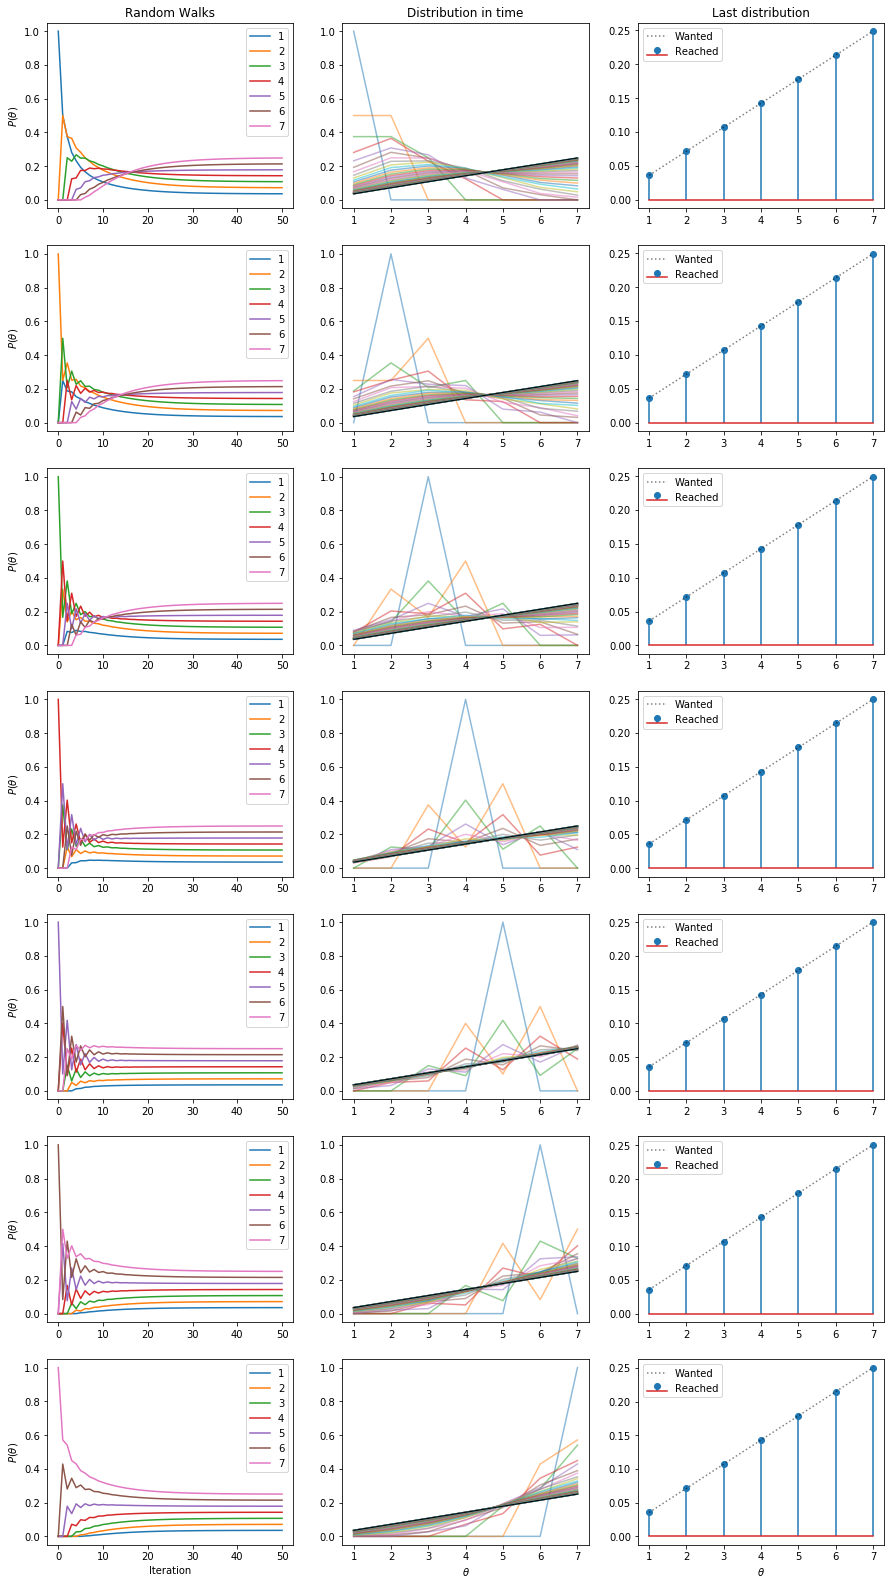

In [28]:
iterations = 50

fig, ax = plt.subplots(7, 3, figsize=(15, 28))

for s in range(7):
    islands_P = np.zeros(7)
    islands_P[s] = 1
    walk = [extended_walk(islands_P)]
    for _ in range(iterations):
        prev_walk = walk[-1]
        walk.append(
            extended_walk(
                [transform(prev_walk, islands_p, i) for i in islands]
            )
        )
    for i in islands:
        ax[s,0].plot(np.array(walk)[:,i], label=i)
        ax[s,0].legend()
        ax[s,0].set_ylabel(r"$P(\theta)$")
    for i in range(len(walk)):
        ax[s,1].plot(islands, walk[i][1:8], alpha=.5)
    ax[s,1].plot(islands, walk[-1][1:8], c="k", lw=1)
    ax[s,2].stem(
        islands, walk[-1][1:8], use_line_collection=True,
        label="Reached"
    )
    ax[s,2].plot(
        [1, 7],
        [walk[-1][1], walk[-1][7]],
        c="k", ls=":", alpha=.5,
        label="Wanted"
    )
    ax[s,2].legend()

ax[0,0].set_title("Random Walks")
ax[0,1].set_title("Distribution in time")
ax[0,2].set_title("Last distribution")
ax[-1,0].set_xlabel("Iteration")
ax[-1,1].set_xlabel(r"$\theta$")
ax[-1,2].set_xlabel(r"$\theta$")

plt.show();

Si puó dimostrare facilmente che se la distribuzione iniziale é la distribuzione target, la distribuzione dello stato successivo del sistema non cambia. Ovvero se

$$
P(\theta) = \frac{\theta}{\sum \theta} \;,\; \forall \theta
$$

allora lo stato successivo $P(\theta)^*$ é

$$
P(\theta)^* = P(\theta) \;,\; \forall \theta
$$

Sappiamo infatti che la probabilitá di essere in $\theta$ é la somma della probabilitá di arrivarci dalla precedente $\theta-1$, di arrivarci dalla successiva $\theta+1$, di restare su $\theta$ se si é giá lí, dunque

$$
P(\theta)^* = P_{\leftarrow(\theta-1)} + P_{\leftarrow(\theta+1)} + P_{\leftarrow(\theta)}
$$

laddove, la probabilitá di arrivare dalla precedente dipende solo dal lancio della moneta quindi

$$
P_{\leftarrow(\theta-1)} = P(\theta-1) \cdot \frac{1}{2} =
\frac{\theta-1}{\sum \theta} \cdot \frac{1}{2} =
\frac{\theta-1}{2 \sum \theta}
$$

la probabilitá di arrivare dalla successiva dipende sia dal lancio della moneta che dal giro di roulette (e quindi dal rapporto tra i due parametri)

$$
P_{\leftarrow(\theta+1)} = 
P(\theta+1) \cdot \frac{1}{2} \cdot \frac{\theta}{\theta+1} =
\frac{\theta+1}{\sum \theta} \cdot \frac{1}{2} \cdot \frac{\theta}{\theta+1} =
\frac{\theta}{2 \sum \theta}
$$

la probabilitá di restare su theta é pari alla probabilitá di esserci meno la probabilitá di andare sulla precedente e sulla successiva

$$
P_{\leftarrow(\theta)} =
P(\theta) - (P_{\rightarrow(\theta-1)} +  P_{\rightarrow(\theta+1)})
$$

dove (come in precedenza)

$$
P_{\rightarrow(\theta-1)} =
P(\theta) \cdot \frac{1}{2} \cdot \frac{\theta-1}{\theta} =
\frac{\theta}{\sum \theta} \cdot \frac{1}{2} \cdot \frac{\theta-1}{\theta} =
\frac{\theta-1}{2 \sum \theta}
$$

e similmente

$$
P_{\rightarrow(\theta+1)} =
P(\theta) \cdot \frac{1}{2} =
\frac{\theta}{\sum \theta} \cdot \frac{1}{2} =
\frac{\theta}{2 \sum \theta}
$$

pertanto

$$
P(\theta)^* =
\frac{\theta-1}{2 \sum \theta} + \frac{\theta}{2 \sum \theta} +
\frac{\theta}{\sum \theta} -
\frac{\theta-1}{2 \sum \theta} - \frac{\theta}{2 \sum \theta} =
\frac{\theta}{\sum \theta}
$$
